In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
plt.style.use('./deeplearning.mplstyle')

In [2]:
X = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1, 1)

In [3]:
def plot_data(x, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc="best"):
    pos = y == 1
    neg = y == 0
    pos = pos.reshape(
        -1,
    )
    neg = neg.reshape(
        -1,
    )
    ax.scatter(x[pos, 0], x[pos, 1], marker="x", s=s, color="r", label=pos_label)
    ax.scatter(
        x[neg, 0],
        x[neg, 1],
        marker="o",
        s=s,
        label=neg_label,
        fc="none",
        ec="blue",
        lw=3,
    )
    ax.legend(loc=loc)
    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

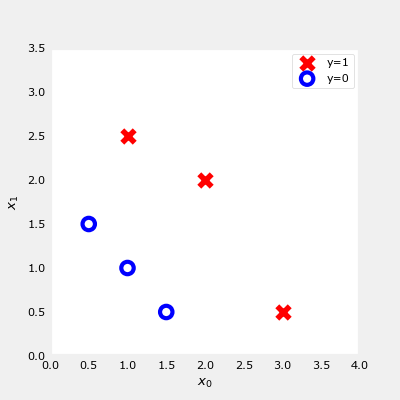

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_data(X, y, ax)
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel("$x_1$")
ax.set_xlabel("$x_0$")
# ax.legend()
plt.show()

In [5]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [6]:
def draw_vthresh(ax, x):
    """draws a threshold"""
    ylim = ax.get_ylim()
    xlim = ax.get_xlim()
    ax.fill_between([xlim[0], x], [ylim[1], ylim[1]], alpha=0.2, color="blue")
    ax.fill_between([x, xlim[1]], [ylim[1], ylim[1]], alpha=0.2, color="darkred")
    ax.annotate(
        "z >= 0",
        xy=[x, 0.5],
        xycoords="data",
        xytext=[30, 5],
        textcoords="offset points",
    )
    # d = FancyArrowPatch(
    #     posA=(x, 0.5), posB=(x+3, 0.5), color='darkred',
    #     arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',
    # )
    # ax.add_artist(d)
    ax.annotate(
        "z < 0",
        xy=[x, 0.5],
        xycoords="data",
        xytext=[-50, 5],
        textcoords="offset points",
        ha="left",
    )
    # f = FancyArrowPatch(
    #     posA=(x, 0.5), posB=(x-3, 0.5), color='blue',
    #     arrowstyle='simple, head_width=5, head_length=10, tail_width=0.0',
    # )
    # ax.add_artist(f)

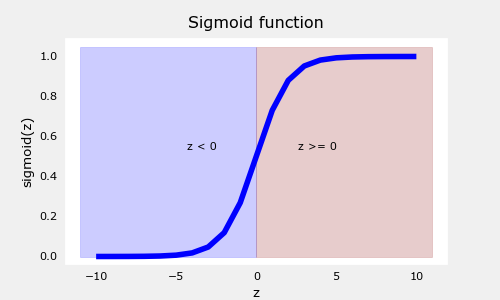

In [7]:
plt.close("all")
z = np.arange(-10, 11)
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(z, sigmoid(z), c="b")
ax.set_title("Sigmoid function")
ax.set_ylabel("sigmoid(z)")
ax.set_xlabel("z")
draw_vthresh(ax, 0)

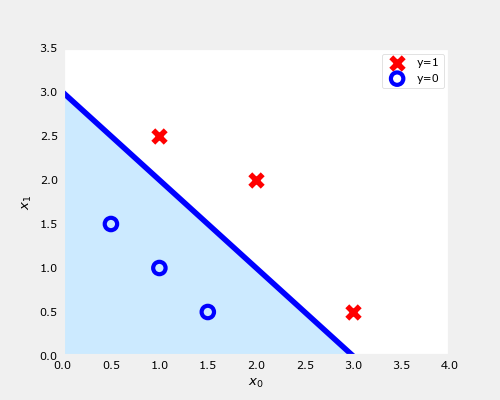

In [8]:
x0 = np.arange(0, 6)
x1 = 3 - x0
plt.close("all")
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(x0, x1, c="b")
ax.axis([0, 4, 0, 3.5])
ax.fill_between(x0, x1, alpha=0.2)
plot_data(X, y, ax)
ax.set_ylabel(r"$x_1$")
ax.set_xlabel(r"$x_0$")
plt.show()

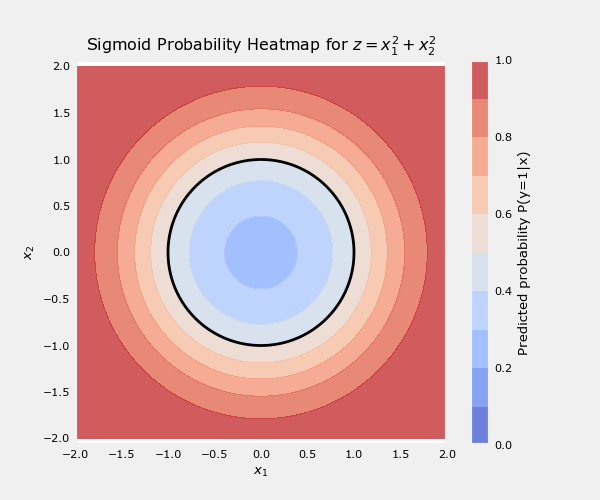

In [8]:
# --- 1. Define a grid of (x1, x2) points -----------------------------
x1_range = np.linspace(-2, 2, 400)
x2_range = np.linspace(-2, 2, 400)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# --- 2. Compute z = x1² + x2² - 1 ----------------------------------
z = x1_grid**2 + x2_grid**2 - 1

# --- 3. Pass through the sigmoid -----------------------------------
sigmoid = 1 / (1 + np.exp(-z))  # same formula you’ve seen before

# --- 4. Plot --------------------------------------------------------
plt.close("all")
fig = plt.figure(figsize=(6, 5))
# Heatmap of probabilities
contour = plt.contourf(
    x1_grid, x2_grid, sigmoid, levels=np.linspace(0, 1, 11), alpha=0.8, cmap="coolwarm"
)
# Decision boundary (probability = 0.5 → z = 0)
plt.contour(x1_grid, x2_grid, z, levels=[0], colors="k", linewidths=2)

plt.colorbar(contour, label="Predicted probability P(y=1|x)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Sigmoid Probability Heatmap for $z = x_1^2 + x_2^2$")

plt.axis("equal")
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
plt.show()